# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#Importing all necessary libraries
import time
import pickle
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.utils import  shuffle
from collections import Counter

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(pd.value_counts(y_train).keys())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =",n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
#read all the sign names from csv file signnames.csv
traffic_sign_names = pd.read_csv('./signnames.csv',index_col=0)

#Function for plotting a list of images

def plot_img(rows=4,cols=4,image=X_train,lab=y_train):
    '''Displaying 4x4 images
       in a single figure.
    '''
    #Generating 16 random numbers between 0 and the number of train data
    #for image indexing
    idx = np.random.randint(0,len(image),rows*cols)
    
    #Creating a subplot of 4x4 cells
    fig,axes = plt.subplots(nrows=rows,ncols=cols,squeeze=True)
    fig.set_dpi(100)
    #Adjusting the subplots axis gapings for better viewing
    fig.subplots_adjust(wspace=0.8,hspace=0.6)
    #creating a empty list to contain the image data
    global labels
    images = []
    labels = []
    for i in idx:
        images.append(image[i])
        labels.append(lab[i])
    
    for i,ax in enumerate(axes.flat):
        #Plot image
        ax.imshow(images[i])
        xlabel = '{}'.format(labels[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    return fig



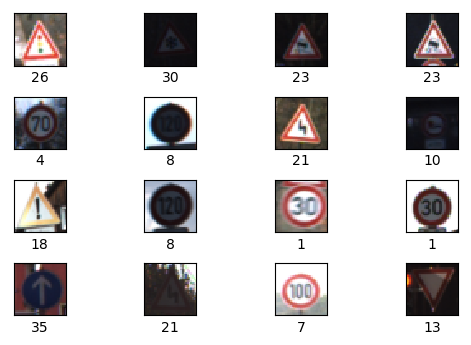

In [5]:
#using plot_img() function to visualize a 4x4 grid size 16 images
plot_img()
plt.show()

In [6]:
#class names for above 16 images
print(traffic_sign_names.iloc[labels])

                                             SignName
ClassId                                              
26                                    Traffic signals
30                                 Beware of ice/snow
23                                      Slippery road
23                                      Slippery road
4                                Speed limit (70km/h)
8                               Speed limit (120km/h)
21                                       Double curve
10       No passing for vehicles over 3.5 metric tons
18                                    General caution
8                               Speed limit (120km/h)
1                                Speed limit (30km/h)
1                                Speed limit (30km/h)
35                                         Ahead only
21                                       Double curve
7                               Speed limit (100km/h)
13                                              Yield


In [7]:
#creating a counter object to see how many examples are available for each image classes
cnt = Counter(y_train)

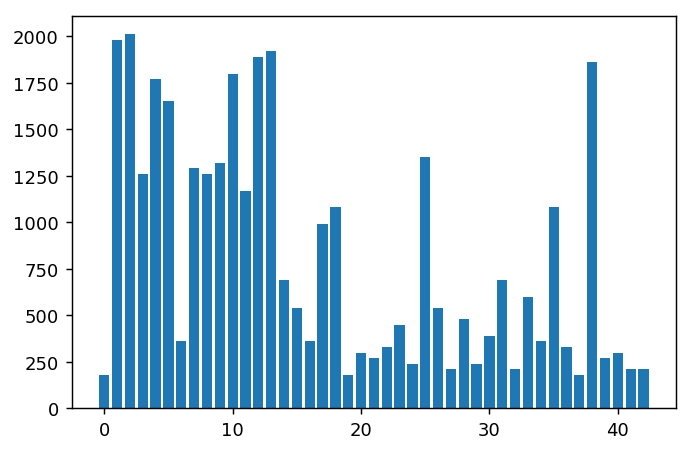

In [8]:
#Visualizing the data discrepancy using a bar plot
fig = plt.figure()
fig.set_dpi(130)
plt.bar(list(cnt.keys()),list(cnt.values()))
plt.show()

In [9]:
#Data Augmentation using tensorflow.image module
img = tf.placeholder(tf.float32,shape=(None,32,32,3))
#setting a random brightness
new_img = tf.image.random_brightness(img,1.3)
#initialize all variables
init = tf.global_variables_initializer()
#starting a tensorflow session
with tf.Session() as sess:
    sess.run(init)
    #store the new distorted images in variable name:distorted_train_img 
    distorted_train_img = new_img.eval(feed_dict={img:X_train})

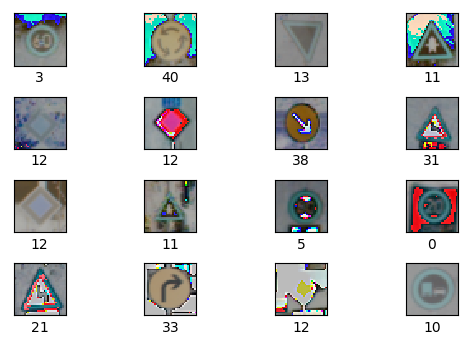

In [10]:
#Visualizing 16 distorted images randomly selected
plot_img(4,4,distorted_train_img)
plt.show()

In [11]:
#Extending thr taining set by cincatenating the traing data with distorted training data 
X_tr = np.concatenate((X_train,distorted_train_img))
y_tr = np.concatenate((y_train,y_train))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [13]:
#converting the image set as a whole to grayscale
def gray_scale(image_data):
    X0 = [0]*len(image_data)
    for i in range(len(image_data)):
        X0[i] = cv2.cvtColor(image_data[i],cv2.COLOR_RGB2GRAY)
    X0 = np.array(X0)
    #Reshaping the data to 32x32x1 shape
    X0 = X0.reshape((-1,32,32,1))
    return X0

In [14]:
#Normalizer
#min-max normalizer
def normalizer(image_data):
    '''Normalizing the data features in between -0.5 to +0.5'''
    channel_min = 0
    channel_max = 255
    a = 0.5
    b = -0.5
    return a + ( ( (image_data - channel_min)*(b - a) )/( channel_max - channel_min ) )

In [15]:
#yet another Normalizer
#zero-mean and one-stddev normalizer
#In this project I used this fn. for normalizing the images
def normalizer_new(image_data):
    return (image_data-image_data.mean())/image_data.std()

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [17]:
#creating a convolutional neural layer with a optional activated relu output

def conv2d(x,shape,strides,padding,name = None,activation=True):
    '''
    shape = [filter_height,fiter_width,color_depth,num_filter]
    strides = [1,stride_length,stride_width,1]
    padding = 'VALID' or 'SAME'
    
    returns the relu activated conv layer
    '''
    #here shape is array/list of size 4 containing
    #filter_height,filter_widtht,depth of color channel and 
    #number of filters
    h,w,color_depth,filter_depth = shape
    #Initializing weights with truncated_normal function with zero mean
    #and standard deviation 0.1
    W = tf.Variable(tf.truncated_normal(shape,mean=0,stddev=0.01))
    #Initializing biases with zero
    b = tf.Variable(tf.zeros(filter_depth))
    #b = tf.Variable(tf.constant(0.1,tf.float32,[filter_depth]))
    #creating the convolution layer (here casting the input data type to float32)
    conv = tf.nn.conv2d(tf.cast(x,dtype=tf.float32),W,strides,padding,use_cudnn_on_gpu=True,name=name)
    #adding the biases
    conv = tf.nn.bias_add(conv,b)
    #Now return the convolution layer with relu activated
    if activation:
        return tf.nn.relu(conv)
    else:
        return conv

In [18]:
#function for a getting a max_pool or avg_pool
def pooling(x,ksize,strides,padding,pool_type='max',name=None):
    '''Arguments:
                 Default MaxPooling
                 pool_type = 'max'or 'avg'
                 ksize = [1,pooling_height,pooling_width,1]
                 use default strides is [1,1,1,1] unless or otherwise specified
       Return Relu activated Maxpool convolution layer
    '''
    if pool_type=='avg':
        #For average pooling
        pool = tf.nn.avg_pool(value=x,ksize=ksize,strides=strides,padding=padding,data_format='NHWC')
    else:
        #For max pooling
        pool= tf.nn.max_pool(value=x,ksize=ksize,strides=strides,padding=padding,data_format='NHWC',name=name)
    return pool

In [19]:
#dropout function
def dropout(x,keep_prob,name=None):
    '''DropOut function'''
    return tf.nn.dropout(x,keep_prob,name=name)

In [20]:
#fully connected layer function
def fully_connected(x,num_outputs,activation):
    '''Fully Connected Neural Network'''
    return tf.contrib.layers.fully_connected(inputs=x,
                                             num_outputs=num_outputs,
                                             activation_fn=activation)

In [21]:
#Function for applying the preprocessing steps 
def prepare_data(data,normalizer_fn='new',is_grayscale=True):
    '''Data is a list of train , validation and test data respectively'''
    train,valid,test = data
    if normalizer_fn=='classic':
        train,valid,test = gray_scale(train),gray_scale(valid),gray_scale(test)
        train,valid,test = normalizer(train),normalizer(valid),normalizer(test)
    elif not is_grayscale and normalizer_fn=='classic':
        train,valid,test = normalizer(train),normalizer(valid),normalizer(test)
    elif not is_grayscale:
        train,valid,test = normalizer_new(train),normalizer_new(valid),normalizer_new(test)
    else:
        train,valid,test = gray_scale(train),gray_scale(valid),gray_scale(test)
        train,valid,test = normalizer_new(train),normalizer_new(valid),normalizer_new(test)
        
    return train,test,valid

In [22]:
#Here I only used all the three color-channels
X_train,X_test,X_valid = prepare_data([X_tr,X_valid,X_test],is_grayscale=False)
#shuffling the training data to avoid any kind of pattern formation
X_train,y_train = shuffle(X_train,y_tr)

In [23]:
#Neural nework model

def model(x,color_chnl):
    '''
    Arguments
    x : a 4-d image array with number of images,height,width,color-channels
    color-chnl: for grayscale image it is 1 and for RGB it is 3
    '''
    
    #declaring global variables to access them later to visualize the features
    global conv_layer_1,max_pool_1,conv_layer_2,max_pool_2,conv_layer_3,max_pool_3,dropout,conv_out,fc_1,fc_2,fc_3
    
    #Adding first convolutional layer
    
    conv_layer_1 = conv2d(x,shape=[3,3,color_chnl,32],strides=[1,1,1,1],padding='VALID',activation=True)
    max_pool_1 = pooling(conv_layer_1,ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
    
    #Adding the second layer
    conv_layer_2 = conv2d(max_pool_1,shape=[5,5,32,128],strides=[1,1,1,1],padding='VALID',activation=True)
    max_pool_2 = pooling(conv_layer_2,ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
    
    #Adding a third layer with a dropout of 0.4
    conv_layer_3 = conv2d(max_pool_2,shape=[5,5,128,256],strides=[1,1,1,1],padding='VALID',activation=True)
    max_pool_3 = pooling(conv_layer_3,ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    dropout = dropout(max_pool_3,keep_prob=0.4)
    conv_out = tf.nn.relu(dropout)
    
    #flattenning the layer 
    flatten = tf.contrib.layers.flatten(conv_out)

    #adding first fully connected layers
    fc_1 = fully_connected(flatten,400,activation=tf.nn.relu)

    #adding second fully connected layer
    fc_2 = fully_connected(fc_1,120,activation=tf.nn.relu)
    
    #adding third fully connected layers
    fc_3 = fully_connected(fc_2,43,activation=None)
    
    return fc_3

In [24]:
#declaring EPOCHS and BATCH_SIZE
EPOCHS,BATCH_SIZE = 10,128

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [26]:
#creating the place holder variables
color_depth = 3
num_labels = 43
input_size = (32,32)
height,width = input_size
x = tf.placeholder(tf.float32, (None,height,width, color_depth))
y = tf.placeholder(tf.int32, (None))
y_one_hot = tf.one_hot(y,num_labels)

In [27]:
#taking a learning rate
rate = 0.001

logits = model(x,3)
softmax_prob = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [28]:
model_prediction = tf.argmax(logits,1)
actual_value = tf.argmax(y_one_hot,1)
correct_prediction = tf.equal(model_prediction,actual_value)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [29]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [30]:
t = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print('Training EPOCH ',i+1)
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train,y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        
        print("Training Accuracy   =====> {:.3f}".format(training_accuracy))
        print("Validation Accuracy =====> {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model/model')
    print("Model saved")
    
print('Total training time with accuracy prediction => ',np.ceil((time.time()-t)/60), ' minutes.')

Training...

Training EPOCH  1
EPOCH 1 ...
Training Accuracy   =====> 0.969
Validation Accuracy =====> 0.916

Training EPOCH  2
EPOCH 2 ...
Training Accuracy   =====> 0.990
Validation Accuracy =====> 0.942

Training EPOCH  3
EPOCH 3 ...
Training Accuracy   =====> 0.991
Validation Accuracy =====> 0.950

Training EPOCH  4
EPOCH 4 ...
Training Accuracy   =====> 0.995
Validation Accuracy =====> 0.950

Training EPOCH  5
EPOCH 5 ...
Training Accuracy   =====> 0.994
Validation Accuracy =====> 0.955

Training EPOCH  6
EPOCH 6 ...
Training Accuracy   =====> 0.998
Validation Accuracy =====> 0.961

Training EPOCH  7
EPOCH 7 ...
Training Accuracy   =====> 0.997
Validation Accuracy =====> 0.963

Training EPOCH  8
EPOCH 8 ...
Training Accuracy   =====> 0.997
Validation Accuracy =====> 0.957

Training EPOCH  9
EPOCH 9 ...
Training Accuracy   =====> 0.994
Validation Accuracy =====> 0.954

Training EPOCH  10
EPOCH 10 ...
Training Accuracy   =====> 0.997
Validation Accuracy =====> 0.966

Model saved
Tot

In [31]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model/'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model/model
Test Accuracy = 0.938


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score
from itertools import product

In [33]:
with tf.Session() as sess:
    y_true = np.array([])
    y_pred = np.array([])
    num_example = len(X_test)
    saver.restore(sess,tf.train.latest_checkpoint('./model/'))
    for offset in range(0,num_example,BATCH_SIZE):
        batch_x, batch_y = X_test[offset:offset+BATCH_SIZE], y_test[offset:offset+BATCH_SIZE]
        y_true = np.concatenate([y_true,sess.run(actual_value,feed_dict={y:batch_y})])
        y_pred = np.concatenate([y_pred,sess.run(model_prediction,feed_dict={x:batch_x})])

INFO:tensorflow:Restoring parameters from ./model/model


In [34]:
cnf_matrix = confusion_matrix(y_true,y_pred)

In [35]:
def plot_confusion():
    plt.imshow(cnf_matrix,cmap=plt.cm.Blues)
    plt.title('Confusion Matrix on Test Data')
    plt.colorbar()
    ticks = np.arange(43)
    plt.xticks(ticks,list(traffic_sign_names.SignName),rotation=90)
    plt.yticks(ticks,list(traffic_sign_names.SignName))
    threshold = cnf_matrix.max()/2
    for i,j in product(range(43),range(43)):
        plt.text(i,j,cnf_matrix[i,j],horizontalalignment='center',
                 color='white' if cnf_matrix[i,j]>threshold else 'black')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

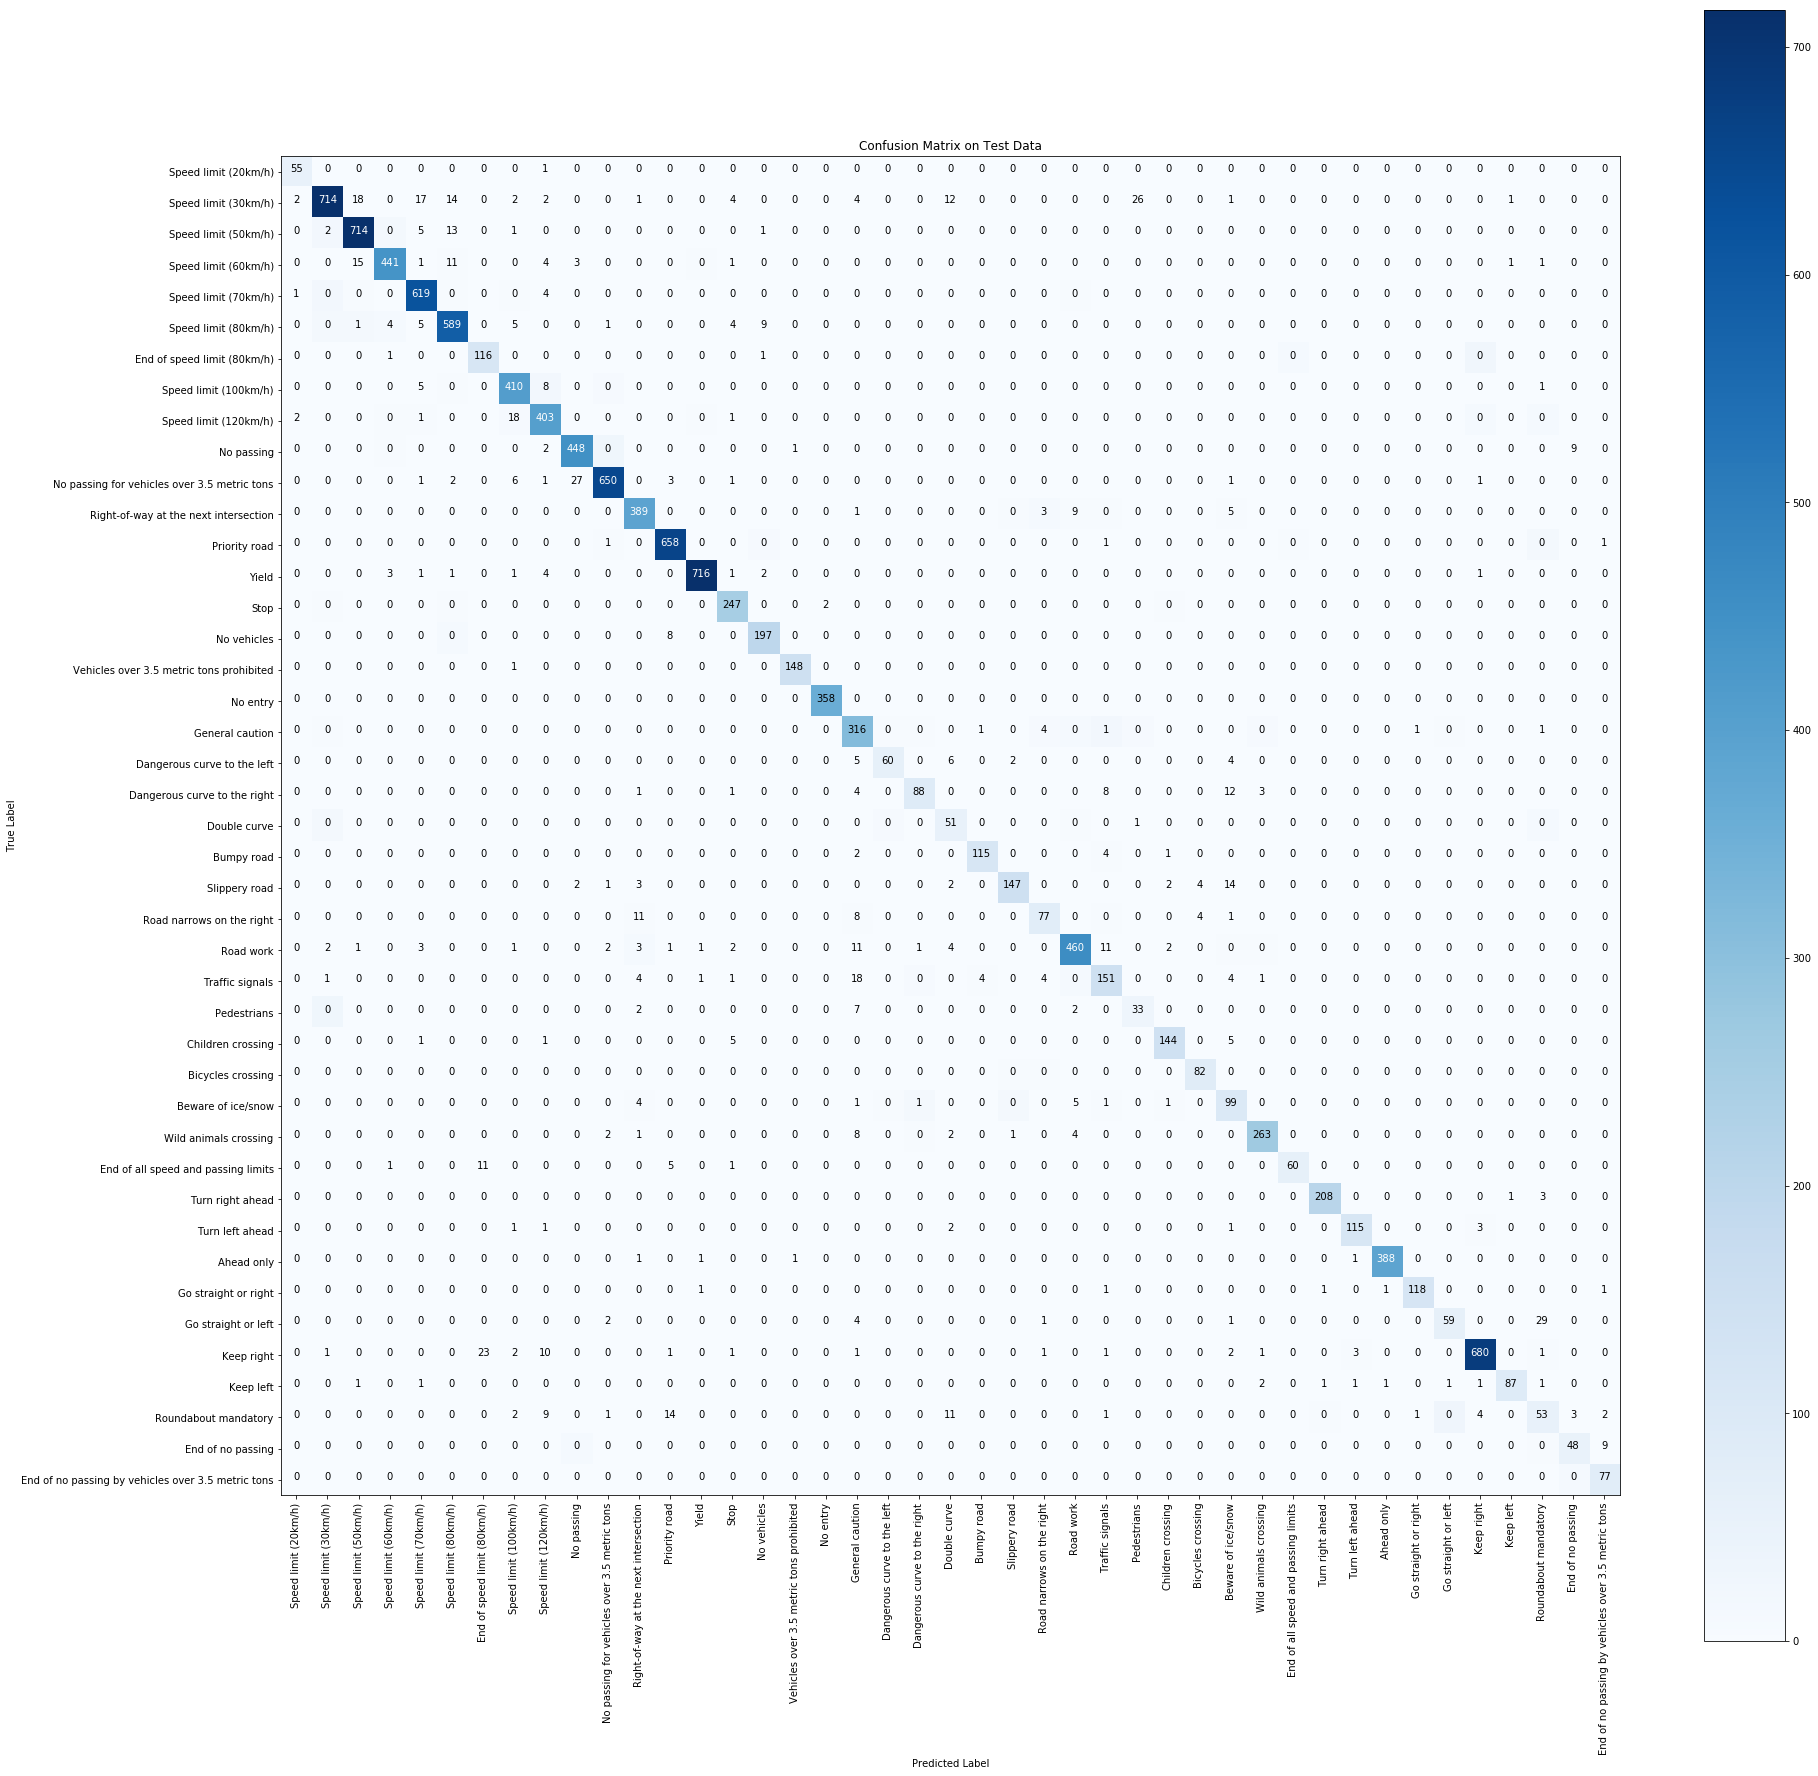

In [36]:
plt.figure(figsize=(30,30))
plot_confusion()
plt.show()

In [43]:
prcsn_score = precision_score(y_true,y_pred,labels=list(range(43)),average=None)
rcl_score = recall_score(y_true,y_pred,labels=list(range(43)),average=None)

In [44]:
print("Precision Score \n: ",prcsn_score)
print()
print("Recall Score \n: ",rcl_score)

Precision Score 
:  [ 0.98214286  0.87286064  0.9701087   0.92259414  0.99198718  0.95307443
  0.98305085  0.96698113  0.94823529  0.97391304  0.93795094  0.95577396
  0.99546142  0.98082192  0.99196787  0.96097561  0.99328859  1.
  0.97530864  0.77922078  0.75213675  0.98076923  0.94262295  0.84
  0.76237624  0.91089109  0.7989418   0.75        0.92307692  1.
  0.88392857  0.93594306  0.76923077  0.98113208  0.93495935  0.98979592
  0.95934959  0.61458333  0.93406593  0.89690722  0.52475248  0.84210526
  1.        ]

Recall Score 
:  [ 0.91666667  0.99166667  0.952       0.98        0.93787879  0.93492063
  0.77333333  0.91111111  0.89555556  0.93333333  0.98484848  0.92619048
  0.95362319  0.99444444  0.91481481  0.93809524  0.98666667  0.99444444
  0.81025641  1.          0.97777778  0.56666667  0.95833333  0.98
  0.85555556  0.95833333  0.83888889  0.55        0.96        0.91111111
  0.66        0.97407407  1.          0.99047619  0.95833333  0.99487179
  0.98333333  0.98333333  0

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os
image_files = os.listdir('./new_test_image/')
test_img = []
for image in image_files:
    img = mpimg.imread(os.path.join('new_test_image',image))
    #reshaping the images to 32x32x3 shape
    img = cv2.resize(img,(32,32))
    test_img.append(img)
    
test_img = np.array(test_img)

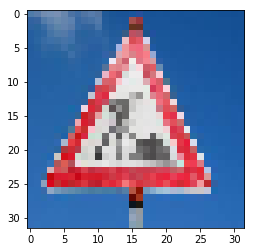

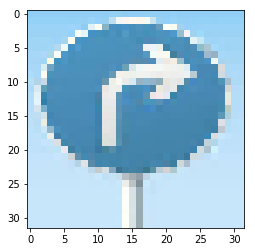

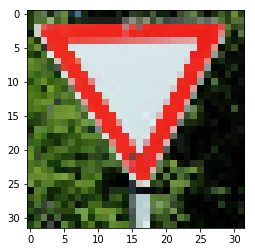

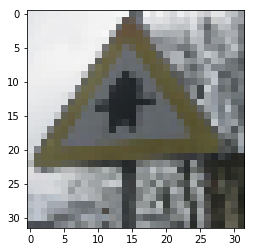

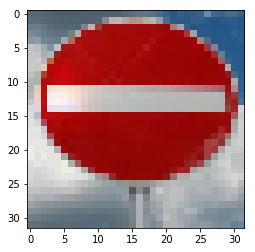

In [46]:
for i in range(5):
    plt.imshow(test_img[i])
    plt.show()

### Predict the Sign Type for Each Image

In [47]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [48]:
#Normalizing the new test images 
X_t = normalizer_new(test_img) 
y_t = np.array([25,33,13,12,17])

In [49]:
#class names of test images
traffic_sign_names.iloc[y_t]

,SignName
ClassId,
25,Road work
33,Turn right ahead
13,Yield
12,Priority road
17,No entry


In [51]:
#Predicting each image type 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model/'))
    softmax_probabilities = sess.run(softmax_prob,feed_dict={x:X_t})
    model_pred= sess.run(model_prediction,feed_dict={x:X_t})
    print(model_pred)

INFO:tensorflow:Restoring parameters from ./model/model
[25 33 13 18 14]


In [52]:
#Class names of each predicted image
traffic_sign_names.iloc[model_pred]

,SignName
ClassId,
25,Road work
33,Turn right ahead
13,Yield
18,General caution
14,Stop


In [53]:
y_pred_new = model_pred
y_true_new = y_t
cnf_matrix_new = confusion_matrix(y_true_new,y_pred_new)
prcsn_score_new = precision_score(y_true_new,y_pred_new,average=None)
rcl_score_new = recall_score(y_true_new,y_pred_new,average=None)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [54]:
print("Confusion Matrix : \n",cnf_matrix_new)
print("Precision score : \n",prcsn_score_new)
print("Recall score: \n",rcl_score_new)

Confusion Matrix : 
 [[0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
Precision score : 
 [ 0.  1.  0.  0.  0.  1.  1.]
Recall score: 
 [ 0.  1.  0.  0.  0.  1.  1.]


### Analyze Performance

In [48]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [55]:
accuracy = np.equal(model_pred,y_t)
correct_prediction_number = Counter(accuracy)[True]
accuracy_percentage = (correct_prediction_number/len(y_t))*100.0
print(accuracy_percentage)

60.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [56]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top5 = tf.nn.top_k(softmax_probabilities,k=5)
with tf.Session() as sess:
    top_five = sess.run(top5)
    print(top_five)

TopKV2(values=array([[  1.00000000e+00,   1.29126541e-08,   4.65050132e-09,
          4.46113813e-10,   1.53569116e-10],
       [  9.58046019e-01,   3.27864066e-02,   6.57916162e-03,
          2.52069533e-03,   3.20893523e-05],
       [  1.00000000e+00,   5.75190882e-13,   2.79979253e-14,
          2.18157761e-15,   1.89522762e-16],
       [  9.99212265e-01,   3.17019119e-04,   2.88116222e-04,
          1.82287971e-04,   1.78536041e-07],
       [  9.99960065e-01,   3.69347472e-05,   1.57299701e-06,
          9.40945313e-07,   5.47192371e-07]], dtype=float32), indices=array([[25, 36, 22, 30, 23],
       [40, 34, 33,  1, 11],
       [13, 10, 34, 42, 35],
       [18, 31, 37, 26,  1],
       [10, 14, 30, 13, 12]], dtype=int32))


In [57]:
#creating a list and append the top-5 class-number,top-5 class-names and top-5 probabilities
df = []
for i in range(5):
    df.append(list(zip(top_five.indices[i],list(traffic_sign_names.iloc[top_five.indices[i]].SignName),
                      top_five.values[i])))

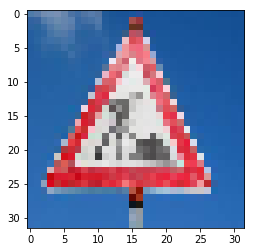

Road work
----------------------------------------------------------------------------------------------------
   ClassID             ClassName  Probabilities
1       25             Road work   1.000000e+00
2       36  Go straight or right   1.291265e-08
3       22            Bumpy road   4.650501e-09
4       30    Beware of ice/snow   4.461138e-10
5       23         Slippery road   1.535691e-10
----------------------------------------------------------------------------------------------------


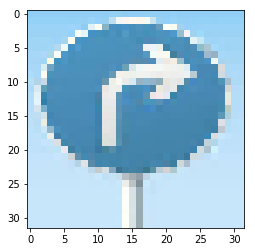

Turn right ahead
----------------------------------------------------------------------------------------------------
   ClassID                              ClassName  Probabilities
1       40                   Roundabout mandatory       0.958046
2       34                        Turn left ahead       0.032786
3       33                       Turn right ahead       0.006579
4        1                   Speed limit (30km/h)       0.002521
5       11  Right-of-way at the next intersection       0.000032
----------------------------------------------------------------------------------------------------


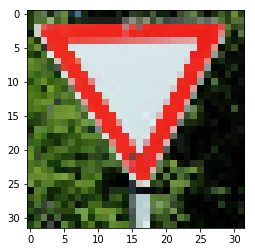

Yield
----------------------------------------------------------------------------------------------------
   ClassID                                          ClassName  Probabilities
1       13                                              Yield   1.000000e+00
2       10       No passing for vehicles over 3.5 metric tons   5.751909e-13
3       34                                    Turn left ahead   2.799793e-14
4       42  End of no passing by vehicles over 3.5 metric ...   2.181578e-15
5       35                                         Ahead only   1.895228e-16
----------------------------------------------------------------------------------------------------


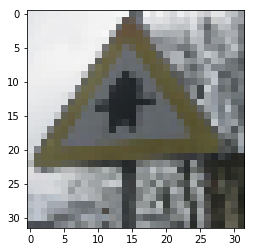

Priority road
----------------------------------------------------------------------------------------------------
   ClassID              ClassName  Probabilities
1       18        General caution   9.992123e-01
2       31  Wild animals crossing   3.170191e-04
3       37    Go straight or left   2.881162e-04
4       26        Traffic signals   1.822880e-04
5        1   Speed limit (30km/h)   1.785360e-07
----------------------------------------------------------------------------------------------------


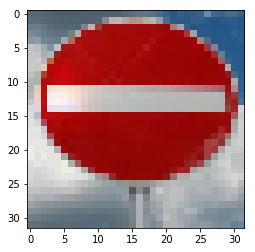

No entry
----------------------------------------------------------------------------------------------------
   ClassID                                     ClassName  Probabilities
1       10  No passing for vehicles over 3.5 metric tons   9.999601e-01
2       14                                          Stop   3.693475e-05
3       30                            Beware of ice/snow   1.572997e-06
4       13                                         Yield   9.409453e-07
5       12                                 Priority road   5.471924e-07
----------------------------------------------------------------------------------------------------


In [58]:
#visualizing the resut
for i in range(5):
    plt.imshow(test_img[i])
    plt.show()
    print(traffic_sign_names.iloc[y_t[i]].SignName)
    print('-'*100)
    print(pd.DataFrame(df[i],index=range(1,6) ,columns=['ClassID','ClassName','Probabilities']))
    print('-'*100)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [59]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

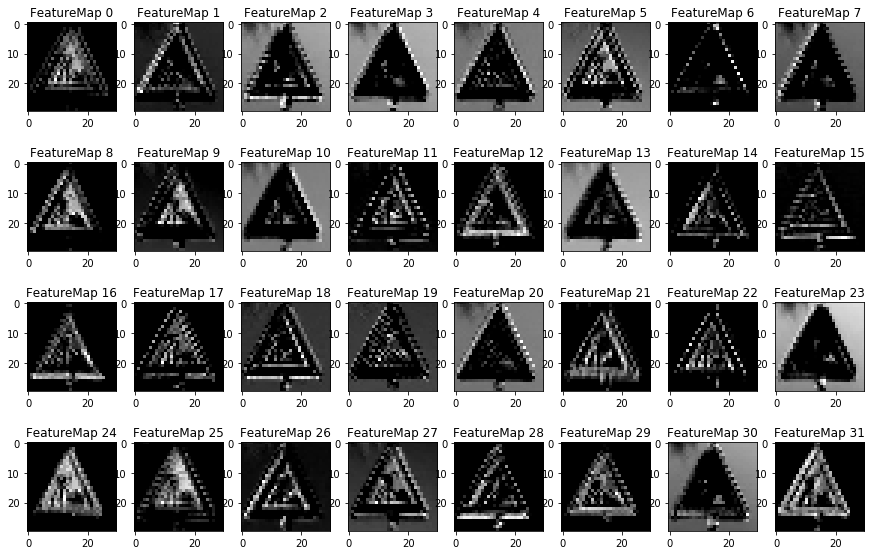

In [60]:
#Running the outputFeatureMap() function over new test_images and visualizing the first convolutional layer
#showing the first convolution layer
outputFeatureMap(X_t,conv_layer_1)
#visualizing the result
plt.show()